In [32]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [33]:
#Charger les donn√©es json

# Chemin vers le fichier JSON
file_path = "studyCorrelation.json"

# Lecture du fichier JSON
with open(file_path, "r", encoding="utf-8") as file:
    data = json.load(file)


In [34]:
# 1. Partie 1 : studyCorrelation (liste d'√©tudiants)

df_study = pd.DataFrame(data["studyCorrelation"])
print("\n=== √âtudiants : studyCorrelation ===")
print(df_study.head())


=== √âtudiants : studyCorrelation ===
   id  hours  score
0   1   6.96     71
1   2   3.90     65
2   3   0.72     81
3   4   0.36     41
4   5   2.11     42


In [35]:
# 2. Partie 2 : courseFormat (succ√®s/√©chec par format de cours)
df_course = pd.DataFrame(data["courseFormat"])
print("\n=== Format de cours : courseFormat ===")
print(df_course)


=== Format de cours : courseFormat ===
      presentiel  distanciel
pass        5915        5210
fail        4085        4790


In [36]:
# 3. Partie 3 : midtermScores (scores mi-parcours de deux classes)
df_midterm = pd.DataFrame(dict(
    class_A=data["midtermScores"]["class_A"],
    class_B=data["midtermScores"]["class_B"]
))
print("\n=== Scores mi-parcours : midtermScores ===")
print(df_midterm.head())


=== Scores mi-parcours : midtermScores ===
   class_A  class_B
0     12.0     11.9
1     10.8     13.2
2     11.7      8.6
3     12.7     10.4
4     13.8     14.6


In [37]:
# 4. Partie 4 : approachGains (gains de points selon m√©thode p√©dagogique)
df_approach = pd.DataFrame(data["approachGains"])
print("\n=== Gains par approche p√©dagogique : approachGains ===")
print(df_approach.head())


=== Gains par approche p√©dagogique : approachGains ===
   Approach1  Approach2  Approach3  Approach4
0        3.6        8.8        4.3        6.9
1        5.0        6.4        4.3        4.6
2        4.5        7.6        4.1        5.5
3        6.0        7.0        5.4        6.1
4        4.5        7.3        4.9        7.1


In [38]:
# 5. Partie 5 : completionTimes (temps pour finir un exercice selon le support)
df_times = pd.DataFrame(data["completionTimes"])
print("\n=== Temps d'ex√©cution : completionTimes ===")
print(df_times.head())


=== Temps d'ex√©cution : completionTimes ===
   None  Simple  Advanced
0  15.6     8.9      12.3
1  18.3    12.1       6.8
2  15.2    12.5       6.4
3  11.9    12.8       8.6
4  16.1    11.5       9.4


R√©ponse √† la deuxi√®me probl√©matique :

Format de cours et certification

Question : Le format de cours (pr√©sentiel vs distanciel) influence-t-il l‚Äôobtention de la certification finale ?

Pourquoi c‚Äôest important ? L‚Äôentreprise envisage de basculer 100 % des formations en ligne. Avant de prendre cetted√©cision, il faut s‚Äôassurer que cela ne compromet pas la r√©ussite des apprenants

In [39]:
# Calculer les taux de r√©ussite



# Calcul des totaux
presentiel_total = df_course['presentiel'].sum()
distanciel_total = df_course['distanciel'].sum()

# Calcul des taux de r√©ussite
presentiel_success_rate = df_course.loc['pass', 'presentiel'] / presentiel_total * 100
distanciel_success_rate = df_course.loc['pass', 'distanciel'] / distanciel_total * 100

# Affichage des taux
print(f"Taux de r√©ussite en pr√©sentiel : {presentiel_success_rate:.2f}%")
print(f"Taux de r√©ussite en distanciel : {distanciel_success_rate:.2f}%")


Taux de r√©ussite en pr√©sentiel : 59.15%
Taux de r√©ussite en distanciel : 52.10%


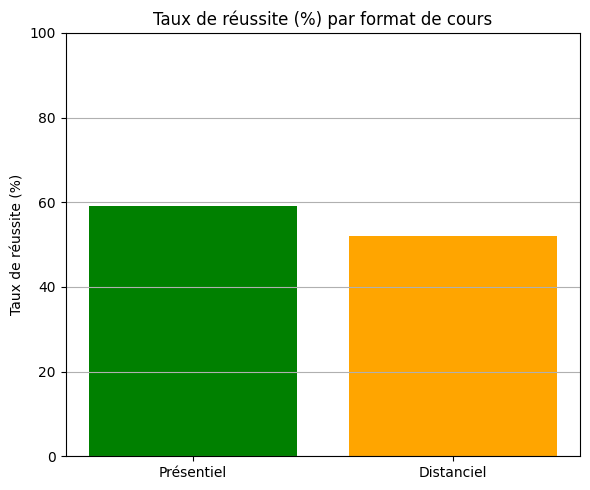

In [40]:
# Visualisation du taux de r√©ussite

formats = ['Pr√©sentiel', 'Distanciel']
success_rates = [presentiel_success_rate, distanciel_success_rate]

plt.figure(figsize=(6,5))
plt.bar(formats, success_rates, color=['green', 'orange'])
plt.title("Taux de r√©ussite (%) par format de cours")
plt.ylabel("Taux de r√©ussite (%)")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


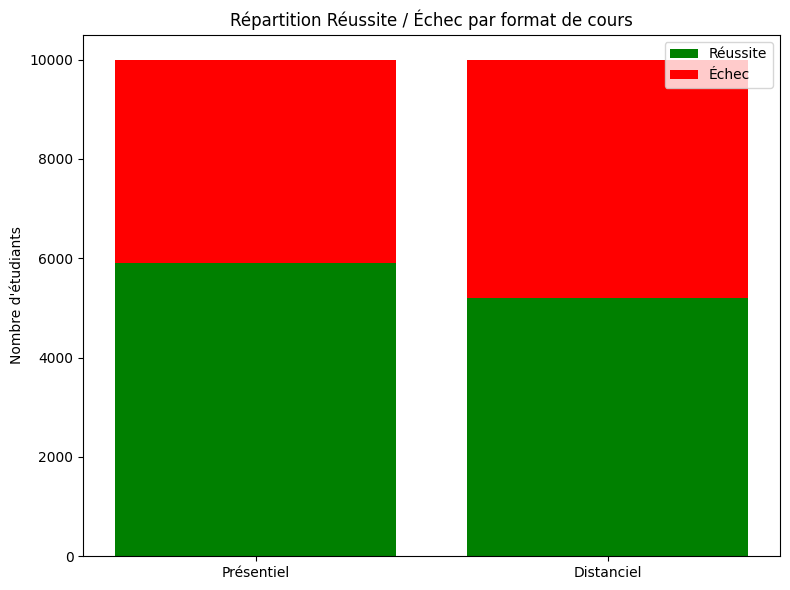

In [41]:
# Visualisation des comptes pass/fail

labels = ['Pr√©sentiel', 'Distanciel']
pass_values = df_course.loc['pass']
fail_values = df_course.loc['fail']

x = np.arange(len(labels))

plt.figure(figsize=(8,6))
plt.bar(x, pass_values, label='R√©ussite', color='green')
plt.bar(x, fail_values, bottom=pass_values, label='√âchec', color='red')

plt.xticks(x, labels)
plt.ylabel("Nombre d'√©tudiants")
plt.title("R√©partition R√©ussite / √âchec par format de cours")
plt.legend()
plt.tight_layout()
plt.show()


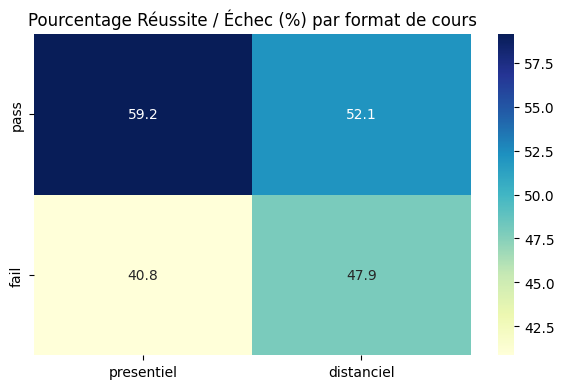

In [42]:
# Montrer la distribution en pourcentage

# Calcul des pourcentages
percent_df = df_course.copy()
percent_df['presentiel'] = (df_course['presentiel'] / df_course['presentiel'].sum()) * 100
percent_df['distanciel'] = (df_course['distanciel'] / df_course['distanciel'].sum()) * 100

# Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(percent_df, annot=True, cmap="YlGnBu", fmt=".1f", cbar=True)
plt.title("Pourcentage R√©ussite / √âchec (%) par format de cours")
plt.tight_layout()
plt.show()

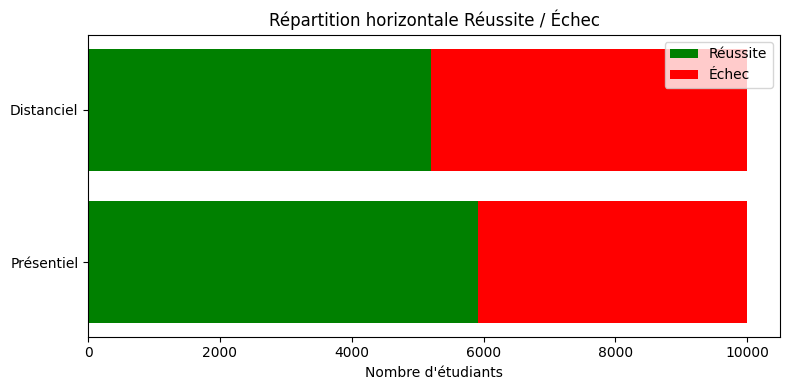

In [43]:
# Diagramme en barres horizontales cumul√©es

# Pr√©paration
labels = ['Pr√©sentiel', 'Distanciel']
success = df_course.loc['pass']
fail = df_course.loc['fail']

# Graphe
plt.figure(figsize=(8,4))
plt.barh(labels, success, color='green', label='R√©ussite')
plt.barh(labels, fail, left=success, color='red', label='√âchec')

plt.xlabel("Nombre d'√©tudiants")
plt.title("R√©partition horizontale R√©ussite / √âchec")
plt.legend()
plt.tight_layout()
plt.show()


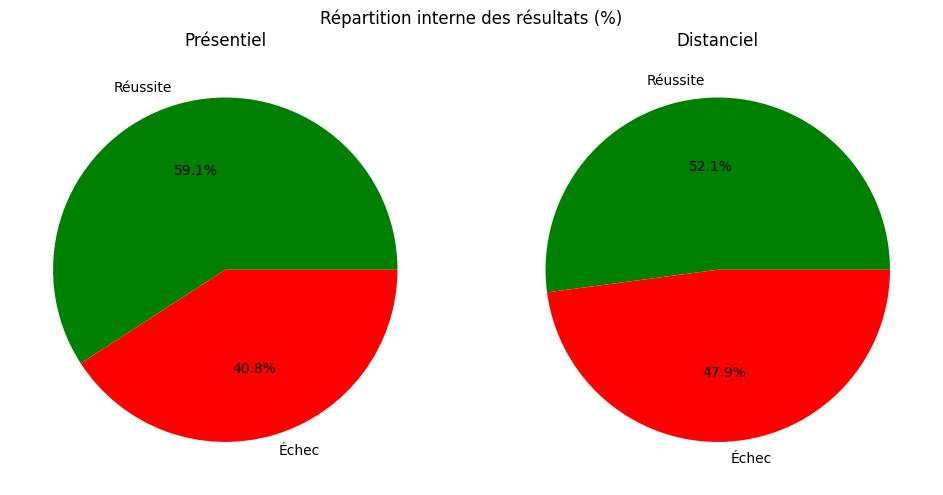

In [44]:
# Stacked pie charts

fig, axs = plt.subplots(1, 2, figsize=(10,5))

# Pr√©sentiel
axs[0].pie(df_course['presentiel'], labels=['R√©ussite', '√âchec'], autopct='%1.1f%%', colors=['green', 'red'])
axs[0].set_title("Pr√©sentiel")

# Distanciel
axs[1].pie(df_course['distanciel'], labels=['R√©ussite', '√âchec'], autopct='%1.1f%%', colors=['green', 'red'])
axs[1].set_title("Distanciel")

fig.suptitle("R√©partition interne des r√©sultats (%)")
plt.tight_layout()
plt.show()

In [46]:
#Simulation d‚Äôun passage √† 100 % distanciel

# Donn√©es actuelles
total_students = df_course['presentiel'].sum() + df_course['distanciel'].sum()
current_successes = df_course.loc['pass'].sum()
current_fails = df_course.loc['fail'].sum()

# Si tout le monde passe en distanciel
dist_success_rate = df_course.loc['pass', 'distanciel'] / df_course['distanciel'].sum()
simulated_success = int(total_students * dist_success_rate)
simulated_fail = total_students - simulated_success

# Impression
print(f"‚úÖ Aujourd'hui : {current_successes} r√©ussites ({current_successes/total_students:.2%})")
print(f"‚ö†Ô∏è 100% distanciel : {simulated_success} r√©ussites ({simulated_success/total_students:.2%})")
print(f"üìâ Perte estim√©e : {current_successes - simulated_success} certifications")


‚úÖ Aujourd'hui : 11125 r√©ussites (55.62%)
‚ö†Ô∏è 100% distanciel : 10420 r√©ussites (52.10%)
üìâ Perte estim√©e : 705 certifications


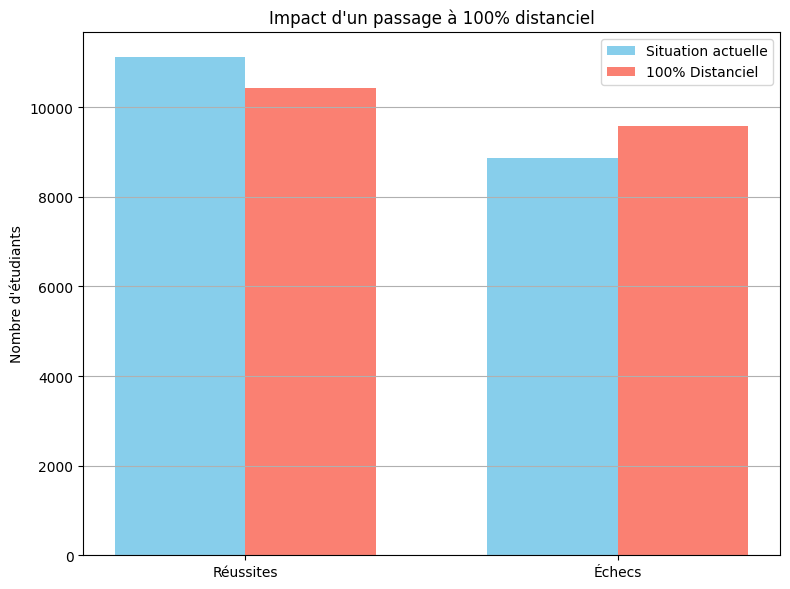

In [47]:
# Comparaison entre la situation actuelle vs 100 % distanciel (barres group√©es)

import matplotlib.pyplot as plt

labels = ['R√©ussites', '√âchecs']
current = [current_successes, current_fails]
simulated = [simulated_success, simulated_fail]

x = range(len(labels))
width = 0.35

plt.figure(figsize=(8,6))
plt.bar(x, current, width=width, label='Situation actuelle', color='skyblue')
plt.bar([i + width for i in x], simulated, width=width, label='100% Distanciel', color='salmon')

plt.xticks([i + width/2 for i in x], labels)
plt.ylabel("Nombre d'√©tudiants")
plt.title("Impact d'un passage √† 100% distanciel")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()




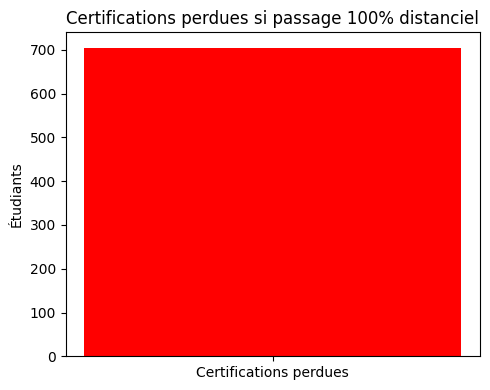

In [48]:
# Perte nette en certifications (barre unique)

perte = current_successes - simulated_success

plt.figure(figsize=(5,4))
plt.bar(['Certifications perdues'], [perte], color='red')
plt.title("Certifications perdues si passage 100% distanciel")
plt.ylabel("√âtudiants")
plt.tight_layout()
plt.show()


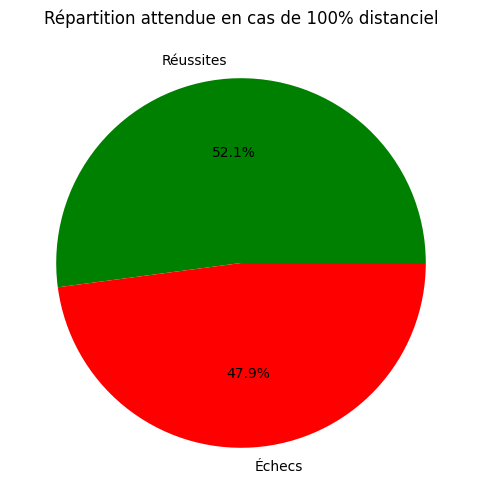

In [49]:
# Diagramme circulaire de la nouvelle r√©partition (100% distanciel)

plt.figure(figsize=(6,6))
plt.pie([simulated_success, simulated_fail],
        labels=["R√©ussites", "√âchecs"],
        autopct='%1.1f%%',
        colors=["green", "red"])
plt.title("R√©partition attendue en cas de 100% distanciel")
plt.show()


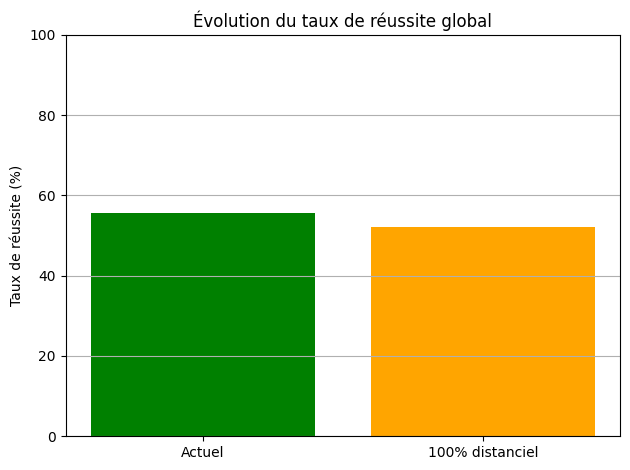

In [50]:
# Barres c√¥te √† c√¥te : taux de r√©ussite actuel vs futur

current_rate = current_successes / total_students * 100
simulated_rate = simulated_success / total_students * 100

plt.bar(["Actuel", "100% distanciel"], [current_rate, simulated_rate], color=["green", "orange"])
plt.ylabel("Taux de r√©ussite (%)")
plt.title("√âvolution du taux de r√©ussite global")
plt.ylim(0, 100)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Les r√©sultats montrent un taux de r√©ussite de 59,15% pour le pr√©sentiel contre 52,10% pour le distanciel.
Bien que la diff√©rence semble mod√©r√©e (‚âà7 points), elle concerne plusieurs centaines d'√©tudiants, ce qui est significatif √† l‚Äô√©chelle de l‚Äôentreprise.

La visualisation en barres empil√©es met en √©vidence une plus grande part d‚Äô√©chec en distanciel.
Cela sugg√®re que bascule compl√®te vers le distanciel pourrait accro√Ætre les √©checs, sauf si des dispositifs de soutien sont mis en place (mentorat, tutoriels, exercices interactifs...).

In [45]:
import nbformat

with open("mission1prob2.ipynb") as f:
    nb = nbformat.read(f, as_version=4)

if 'widgets' in nb.metadata and 'state' not in nb.metadata['widgets']:
    nb.metadata['widgets']['state'] = {}